<a href="https://colab.research.google.com/github/FathimaNadhaMK/HospitalManagement/blob/main/Employe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("/content/sample_data/adult 3.csv")
data.head(15)


In [ ]:
data.shape

(48842, 15)

In [ ]:
data.isna().sum()
print(data.workclass.value_counts())

In [ ]:
data.workclass.replace({'?':'Others'},inplace=True)
print('Workclass')
print(data['workclass'].value_counts())

In [ ]:
data

In [ ]:
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [ ]:
print(data.education.value_counts())

In [ ]:
data.occupation.replace({'?':'Others'},inplace=True)

In [ ]:
plt.boxplot(data['age'])
plt.show()

In [ ]:
data=data[(data['age']<=75) & (data['age']>=17)]

In [ ]:
data.workclass.value_counts()

In [ ]:
# in the above code 'without-pay and 'never-worked' having very less count as well as they are not earning
# so not required for income prediction
# so we can remove such data
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']

In [ ]:
data.shape

(48438, 15)

In [ ]:
data=data[data['education']!='1st-4th']
data=data[data['education']!='5th-6th']
data=data[data['education']!='Preschool']

In [ ]:
data.education.value_counts()

,count
education,
HS-grad,15655
Some-college,10824
Bachelors,7983
Masters,2634
Assoc-voc,2053
11th,1801
Assoc-acdm,1592
10th,1373
7th-8th,899


In [ ]:
data.drop(columns=['education'],inplace=True)
data.columns


Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [ ]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['workclass']=encoder.fit_transform(data['workclass'])
data['marital-status']=encoder.fit_transform(data['marital-status'])
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])
data['race']=encoder.fit_transform(data['race'])
data['gender']=encoder.fit_transform(data['gender'])
data['native-country']=encoder.fit_transform(data['native-country'])
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,8,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39,<=50K
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39,>50K
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39,<=50K
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39,<=50K


In [ ]:
X=data.drop(columns=['income'])
Y=data['income']
X

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,4,6,3,2,1,0,0,40,39
1,38,3,89814,9,2,4,0,4,1,0,0,50,39
2,28,1,336951,12,2,11,0,4,1,0,0,40,39
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39
4,18,2,103497,10,4,8,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39


In [ ]:
Y

,income
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K
...,...
48837,<=50K
48838,>50K
48839,<=50K
48840,<=50K


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[0.13793103, 0.5       , 0.14512876, ..., 0.        , 0.39795918,
        0.95121951],
       [0.36206897, 0.5       , 0.05245126, ..., 0.        , 0.5       ,
        0.95121951],
       [0.18965517, 0.16666667, 0.21964867, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.70689655, 0.5       , 0.09446153, ..., 0.        , 0.39795918,
        0.95121951],
       [0.0862069 , 0.5       , 0.12800425, ..., 0.        , 0.19387755,
        0.95121951],
       [0.60344828, 0.66666667, 0.18648211, ..., 0.        , 0.39795918,
        0.95121951]])

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=23,stratify=Y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
predict=knn.predict(xtest)
predict

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict)

0.8167786644267114

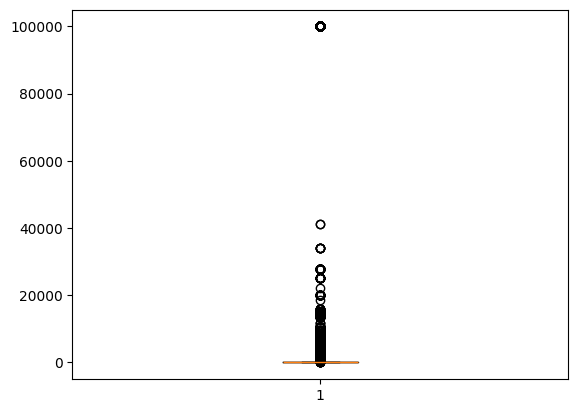

In [ ]:
plt.boxplot(data['capital-gain'])
plt.show()

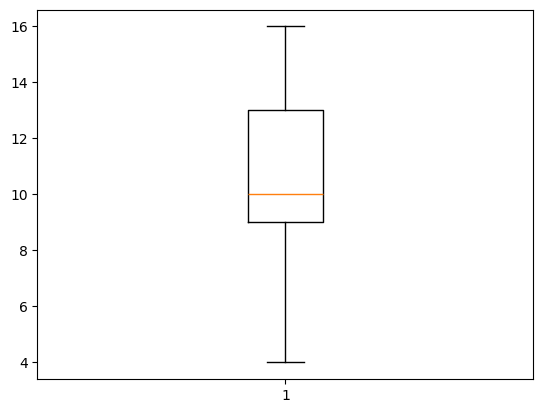

In [ ]:
plt.boxplot(data['educational-num'])
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder   #import libarary
encoder=LabelEncoder()                       #create object
data['workclass']=encoder.fit_transform(data['workclass']) #7 categories   0,1, 2, 3, 4, 5, 6,
data['marital-status']=encoder.fit_transform(data['marital-status'])   #3 categories 0, 1, 2
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])      #5 categories  0, 1, 2, 3, 4
data['race']=encoder.fit_transform(data['race'])
data['gender']=encoder.fit_transform(data['gender'])    #2 catogories     0, 1
data['native-country']=encoder.fit_transform(data['native-country'])

In [ ]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,8,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39,<=50K
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39,>50K
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39,<=50K
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39,<=50K


In [ ]:
x=data.drop(columns=['income'])
y=data['income']
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,4,6,3,2,1,0,0,40,39
1,38,3,89814,9,2,4,0,4,1,0,0,50,39
2,28,1,336951,12,2,11,0,4,1,0,0,40,39
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39
4,18,2,103497,10,4,8,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39


In [ ]:
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_test, y_pred))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


F1 Score: 0.6945418127190787
LogisticRegression Accuracy: 0.8291
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7277
           1       0.71      0.47      0.56      2247

    accuracy                           0.83      9524
   macro avg       0.78      0.70      0.73      9524
weighted avg       0.82      0.83      0.82      9524

RandomForest Accuracy: 0.8637
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7277
           1       0.75      0.64      0.69      2247

    accuracy                           0.86      9524
   macro avg       0.82      0.79      0.80      9524
weighted avg       0.86      0.86      0.86      9524

KNN Accuracy: 0.8337
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7277
           1       0.66      0.60      0.63      2247

    accuracy                           0.83      9524
   macro avg

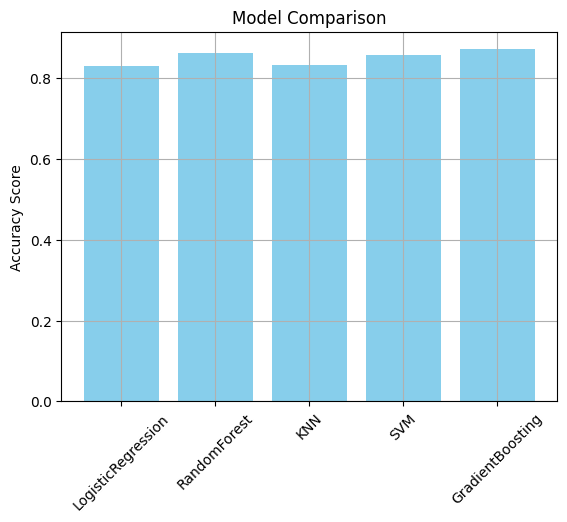

In [ ]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
data.to_csv("cleaned_adult3.csv", index=False)
print("✅ Cleaned data saved as cleaned_adult3.csv")


✅ Cleaned data saved as cleaned_adult3.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import joblib

# Define features
categorical_features = ['workclass', 'marital-status', 'occupation', 'relationship',
                        'race', 'gender', 'native-country']
numeric_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

# Assuming x and y already defined
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {acc:.4f}")

# Save entire pipeline
joblib.dump(pipeline, 'best_model.pkl')
print("✅ Saved full pipeline with preprocessing as best_model.pkl")


✅ Model Accuracy: 0.8719
✅ Saved full pipeline with preprocessing as best_model.pkl


In [ ]:
!pip install streamlit colabcode


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl (from colabcode) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^
Please use pip<24.1 if you need to use this version.
INFO: pip is looking at multiple versions of colabcode to determine which version is compatible with other requirements. This could take a while.
  Using cached uvicorn-0.13.1-py3-none-any.whl.metadata (4.6 kB)
Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl (from colabcode) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    python-dotenv (>=0.13.*) ; extra == 'standard

In [ ]:
!pip install pyngrok
from pyngrok import ngrok

# Replace with your actual authtoken
ngrok.set_auth_token("30Gc9z9tubzOlnKZVsoSScVIUNH_3yQUwqxLQUmfXDWVq3H1M")


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# --- Load Models ---
classifier = joblib.load("best_model.pkl")  # Classification Model
regressor = joblib.load("regression_model.pkl")  # Linear Regression Model

# --- Streamlit Page Config ---
st.set_page_config(page_title="🎯 Income Estimator & Classifier", page_icon="💰", layout="wide")

# --- Custom Styling ---
st.markdown("""
<style>
/* General background */
body {
    background-color: #1e1e2f;
    color: #f0f0f0;
    font-family: 'Segoe UI', sans-serif;
}

/* Main container */
.main {
    background-color: #2a2a40;
    padding: 2rem;
    border-radius: 16px;
    box-shadow: 0 6px 20px rgba(0,0,0,0.2);
}

/* Title and headings */
h1, h2, h3 {
    color: #f2f2f2;
    text-shadow: 1px 1px 2px #00000050;
}

/* Buttons */
.stButton > button {
    background: linear-gradient(90deg, #ff6a00, #ee0979);
    color: white;
    font-weight: bold;
    border: none;
    border-radius: 12px;
    padding: 0.6rem 1.2rem;
    transition: 0.3s;
    box-shadow: 0px 4px 8px rgba(255, 106, 0, 0.4);
}
.stButton > button:hover {
    background: linear-gradient(90deg, #ee0979, #ff6a00);
    transform: scale(1.02);
}

/* Download button */
.stDownloadButton > button {
    background: linear-gradient(to right, #1cb5e0, #000851);
    color: white;
    font-weight: bold;
    border-radius: 10px;
    padding: 0.5rem 1.2rem;
    border: none;
    transition: 0.3s;
}
.stDownloadButton > button:hover {
    background: linear-gradient(to right, #000851, #1cb5e0);
    transform: scale(1.02);
}

/* Sidebar */
.css-1d391kg, .css-1d391kg > div {
    background-color: #2e2e4d !important;
    color: white;
    border-right: 1px solid #444;
}

/* DataFrame preview */
.css-1r6slb0 {
    background-color: #282c34 !important;
    color: white !important;
    border-radius: 12px;
    border: 1px solid #444;
    overflow: hidden;
}

/* Progress bar */
.stProgress > div > div > div > div {
    background-color: #00ff99;
}
</style>
""", unsafe_allow_html=True)


# --- Title ---
st.title("💼 Employee Income Estimator & Classifier")
st.write("🔍 Predict whether someone earns **>50K or ≤50K**, and estimate **actual salary** using machine learning.")

# --- Sidebar Inputs ---
st.sidebar.header("📋 Input Employee Details")

def get_user_input():
    return pd.DataFrame({
        'age': [st.sidebar.slider("Age", 18, 65, 30)],
        'workclass': [st.sidebar.selectbox("Workclass", [
            "Private", "Self-emp-not-inc", "Self-emp-inc", "Federal-gov", "Local-gov",
            "State-gov", "Without-pay", "Never-worked"
        ])],
        'fnlwgt': [st.sidebar.number_input("Final Weight (fnlwgt)", 10000, 1000000, 150000)],
        'education': [st.sidebar.selectbox("Education Level", [
            "Bachelors", "Masters", "PhD", "HS-grad", "Assoc", "Some-college", "Preschool",
            "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th"
        ])],
        'educational-num': [st.sidebar.slider("Education Number", 1, 16, 10)],
        'marital-status': [st.sidebar.selectbox("Marital Status", [
            "Never-married", "Married-civ-spouse", "Divorced", "Separated", "Married-spouse-absent", "Widowed"
        ])],
        'occupation': [st.sidebar.selectbox("Occupation", [
            "Tech-support", "Craft-repair", "Other-service", "Sales", "Exec-managerial", "Prof-specialty",
            "Handlers-cleaners", "Machine-op-inspct", "Adm-clerical", "Farming-fishing", "Transport-moving",
            "Priv-house-serv", "Protective-serv", "Armed-Forces"
        ])],
        'relationship': [st.sidebar.selectbox("Relationship", [
            "Wife", "Own-child", "Husband", "Not-in-family", "Other-relative", "Unmarried"
        ])],
        'race': [st.sidebar.selectbox("Race", [
            "White", "Black", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other"
        ])],
        'gender': [st.sidebar.selectbox("Gender", ["Male", "Female"])],
        'capital-gain': [st.sidebar.number_input("Capital Gain", 0, 100000, 0)],
        'capital-loss': [st.sidebar.number_input("Capital Loss", 0, 100000, 0)],
        'hours-per-week': [st.sidebar.slider("Hours per week", 1, 80, 40)],
        'native-country': [st.sidebar.selectbox("Native Country", [
            "United-States", "India", "Mexico", "Philippines", "Germany", "Canada", "England", "China", "Other"
        ])],
        'experience': [st.sidebar.slider("Years of Experience", 0, 40, 5)],
    })

input_df = get_user_input()
st.markdown("### 🔎 Input Summary")
st.dataframe(input_df)

# --- Predict Button ---
if st.button("🔮 Predict Income & Estimate Salary"):
    # Classification
    pred_class = classifier.predict(input_df)[0]
    label = ">50K" if pred_class == 1 else "≤50K"
    emoji = "🟢" if pred_class == 1 else "🔵"

    # Probability
    if hasattr(classifier, "predict_proba"):
        proba = classifier.predict_proba(input_df)[0][1]  # Probability of >50K
        st.progress(int(proba * 100))
        st.info(f"📊 Model Confidence for '>50K': **{proba*100:.2f}%**")

    # Regression Estimate
    salary = regressor.predict(input_df)[0]
    salary_fmt = f"${salary:,.0f}"

    st.success(f"{emoji} Predicted Salary Class: **{label}**")


# --- Batch Prediction ---
st.markdown("---")
st.markdown("### 📁 Batch Prediction (Upload CSV)")

uploaded_file = st.file_uploader("Upload a CSV file with matching column names", type=["csv"])
if uploaded_file is not None:
    batch_df = pd.read_csv(uploaded_file)
    missing = set(input_df.columns) - set(batch_df.columns)
    if missing:
        st.error(f"❌ Missing columns in file: {missing}")
    else:
        st.write("📄 Preview:")
        st.dataframe(batch_df.head())

        # Predict
        cls_preds = classifier.predict(batch_df)
        reg_preds = regressor.predict(batch_df)

        batch_df["Class Prediction"] = [">50K" if p == 1 else "≤50K" for p in cls_preds]
        batch_df["Salary Estimate"] = [f"${x:,.0f}" for x in reg_preds]

        st.markdown("### ✅ Predictions")
        st.dataframe(batch_df.head())

        # Download link
        csv = batch_df.to_csv(index=False).encode("utf-8")
        st.download_button("📥 Download Results CSV", csv, "batch_predictions.csv", "text/csv")


Overwriting app.py


In [ ]:
# Run Streamlit app
import threading
import time
import os

def run_app():
    os.system("streamlit run app.py")

thread = threading.Thread(target=run_app)
thread.start()

# Wait a bit for the app to start
time.sleep(5)
ngrok.kill()
# Create ngrok tunnel
public_url = ngrok.connect(8501)
print("🌐 Streamlit app is live at:", public_url)

🌐 Streamlit app is live at: NgrokTunnel: "https://6441df21448b.ngrok-free.app" -> "http://localhost:8501"


In [6]:
import joblib

# Save model as a pickle file
joblib.dump(Employe.ipynb, 'knn_model.pkl')


NameError: name 'Employe' is not defined